In [2]:
import requests
import pandas as pd
from config import constants,api_key
import module

In [5]:
POPULAR_POST_ENDPOINT = "/getTopPopularPosts"

## Making API call to Reddit api

In [ ]:

querystring = {"time":"year"}# required parameter
headers = {
	"X-RapidAPI-Key": api_key.RAPID_API_KEY,
	"X-RapidAPI-Host": constants.RAPID_API_HOST
}
response = requests.get(constants.BASE_URL + POPULAR_POST_ENDPOINT, headers=headers, params=querystring)


In [7]:
data_popular = response.json()

## Turning into data frame

In [37]:
popular_posts =[]
for post in data_popular['data']['posts']:
    popular_post= {
        "id":post['id'],
        "title":post['title'],
        "numComments":post['numComments'],
        "score":post['score'],
        "author":post['author'],
        "authorId":post['authorId'],
        "goldCount":post['goldCount'],
        "domain":post['domain']}
    popular_posts.append(popular_post)

popular_posts_df = pd.DataFrame(popular_posts)

In [4]:
popular_posts_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain
0,t3_11ia0od,"Hi, I’m Keanu Reeves, AMA",32997,290221,lionsgate,t2_2yjg9dt0,21,i.redd.it
1,t3_187p59c,YSK MTN DEW GAME FUEL is back! Partnering with...,0,0,MTNDEWGaming,t2_t4otn2sq,0,mountaindew.com
2,t3_144f6xm,📣 Apollo will close down on June 30th. Reddit’...,15438,220416,iamthatis,t2_4mwol,354,self.apolloapp
3,t3_17xjfyu,Left the office & found the neighbors cat in m...,3475,218627,go_fight_kickass,t2_12g6zr,0,i.redd.it
4,t3_10lcvuy,Trust the process guys,4228,218095,ThoumasTurbando,t2_usejv7ts,3,v.redd.it


In [41]:
# Saving csv file
popular_posts_df.to_csv("popular_posts.csv",index=False)

## Getting Data Science Subreddit Posts

In [2]:
SUBREDDIT_POSTS_ENDPOINT = "/getPostsBySubreddit"
querystring = {"subreddit":"datascience","sort":"new"}

headers = {
	"X-RapidAPI-Key": api_key.RAPID_API_KEY,
	"X-RapidAPI-Host": constants.RAPID_API_HOST
}

response = requests.get(constants.BASE_URL+SUBREDDIT_POSTS_ENDPOINT, headers=headers, params=querystring)



In [3]:
data_science_posts = response.json()

In [4]:
ds_posts =[]
for post in data_science_posts['data']['posts']:
    ds_post= {
        "id":post['id'],
        "title":post['title'],
        "numComments":post['numComments'],
        "score":post['score'],
        "author":post['author'],
        "authorId":post['authorId'],
        "goldCount":post['goldCount'],
        "domain":post['domain']}
    ds_posts.append(ds_post)

ds_posts_df = pd.DataFrame(ds_posts)

In [5]:
ds_posts_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain
0,t3_18qtaid,Probability reference book for data science pr...,19,50,HStuart18,t2_xfx8ms4,0,self.datascience
1,t3_18qrkqj,Have an upcoming interview for a data analyst ...,23,21,Impossible-Cry-495,t2_903k40ag,0,self.datascience
2,t3_18qbsme,Weekly Entering & Transitioning - Thread 25 De...,5,6,AutoModerator,t2_6l4z3,0,self.datascience
3,t3_18q5xz2,"Should I work over Christmas to fix my code, o...",47,48,ManagementObvious631,t2_9rp766xc1,0,self.datascience
4,t3_18q5vq6,PyTorch LSTM for time series,29,15,medylan,t2_44oxrfns,0,self.datascience


In [9]:
# Saving to csv file
ds_posts_df.to_csv("data_science_posts.csv", index=False)

In [14]:
# Trying to get posts' whole text
# Getting the text from data and returns as a string
def get_post_text(post_text):
    post_string=""
    for line in post_text:
        post_string+=line['c'][0]['t']
    return post_string

In [15]:
# Getting the text for one post
post_1 = data_science_posts['data']['posts'][1]

In [16]:
#Printing the post text
get_post_text(post_1['media']['richtextContent']['document'])

'I have an interview at a company called Airbus. This would be my first interview specifically for a data analyst role. What should I expect?'

In [17]:
# Trying to get the text for all posts 
post_texts = [get_post_text(post['media']['richtextContent']['document']) for post in data_science_posts['data']['posts']]


KeyError: 't'

In [143]:
# Fixing the error with updated function
# Getting a post's text as a string. Takes post text data in a hiarachical structure. Get the string data from structure and concat them in one string an return that.
# If response doesn't have the data returns None as a string
def get_post_text(post_text):
    post_string=""
    if (len(post_text) == 0):# If data is empty
        return "None"
   
    for text in post_text: 
        try: 
           for line in text['c']:
               
               post_string+= line['t'] # Gettin one sentence in post and adding to the string
               
        except KeyError:# If data have nested structure
            try:
                for sentence in line['c']:
                    post_string += sentence['c'][0]['t'] # Getting the data in the nested structure and adding to the string 
            except:
                continue # for the 'e' key that we dont need
        
        
    return post_string

In [144]:
# For every post in the data science subreddit getting whole posts' texts
post_texts = [get_post_text(post['media']['richtextContent']['document']) for post in data_science_posts['data']['posts']]


In [149]:
post_texts[7]

"I see LLM's are all the rage these days. Learning and applying NLP projects seem redundant when you can fine tune a LLM model and get equally better results.I want to learn what domain of DS/AI would you recommend investing my time in and why from future job scope perspective: Classical ML NLP CV Other (please specify)Thank you! Happy holidays everyone🎅!"

In [150]:
# Adding the post text as a column to the dataframe
ds_posts_df['post_text'] =post_texts

In [152]:
ds_posts_df.head()

,id,title,numComments,score,author,authorId,goldCount,domain,post_text
0,t3_18qtaid,Probability reference book for data science pr...,19,50,HStuart18,t2_xfx8ms4,0,self.datascience,"Hi all, I'd like to rehash my understanding of..."
1,t3_18qrkqj,Have an upcoming interview for a data analyst ...,23,21,Impossible-Cry-495,t2_903k40ag,0,self.datascience,I have an interview at a company called Airbus...
2,t3_18qbsme,Weekly Entering & Transitioning - Thread 25 De...,5,6,AutoModerator,t2_6l4z3,0,self.datascience,Welcome to this week's entering & transitionin...
3,t3_18q5xz2,"Should I work over Christmas to fix my code, o...",47,48,ManagementObvious631,t2_9rp766xc1,0,self.datascience,"Edit: changed a date.It's a long story, but ba..."
4,t3_18q5vq6,PyTorch LSTM for time series,29,15,medylan,t2_44oxrfns,0,self.datascience,Does anyone have a good resource or example pr...


In [154]:
ds_posts_df[['title','post_text']]

,title,post_text
0,Probability reference book for data science pr...,"Hi all, I'd like to rehash my understanding of..."
1,Have an upcoming interview for a data analyst ...,I have an interview at a company called Airbus...
2,Weekly Entering & Transitioning - Thread 25 De...,Welcome to this week's entering & transitionin...
3,"Should I work over Christmas to fix my code, o...","Edit: changed a date.It's a long story, but ba..."
4,PyTorch LSTM for time series,Does anyone have a good resource or example pr...
5,👋 We're ButcherBox and we believe humanely rai...,None
6,"MS statisticians here, do you guys have good c...",Had a long chat with a relative who was trying...
7,What Domain of DS will have most jobs in the f...,I see LLM's are all the rage these days. Learn...
8,Walk forward validation,"Hey folks, I am learning Time series Forecasti..."
9,Job hunt status: feeling defeated,How do you land a data job when you’re a physi...


In [155]:
# Saving again with post texts
ds_posts_df.to_csv("data_science_posts.csv", index=False)

## Data Analyze and Viz

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
# Loading the data
popular_posts_df = pd.read_csv("popular_posts.csv")
ds_posts_df = pd.read_csv("data_science_posts.csv")

## Popular Posts

In [158]:
popular_posts_df.sample(5)

,id,title,numComments,score,author,authorId,goldCount,domain
5,t3_10g1mlg,"This woman was so nervous about flying, so the...",3315,204970,umbertocsaba,t2_j7pywcla,2,i.redd.it
26,t3_17wva9w,Your favorite game is iconic. Make it official...,0,18,PringlesUS,t2_apioax4u,0,ign.com
15,t3_159j24q,CEO. Upvote this so when people search for cea...,1331,176770,ReflectionSingle6681,t2_el80bp1j,12,i.redd.it
28,t3_10buzhy,The true winner of that night's game,1665,168807,sorahiel,t2_t8g3yzc2,1,v.redd.it
23,t3_10hod7a,Woman takes the brunt of the impact of this ca...,4513,169714,sewn_of_a_gun,t2_bgahzckc,1,v.redd.it


In [160]:
popular_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           29 non-null     object
 1   title        29 non-null     object
 2   numComments  29 non-null     int64 
 3   score        29 non-null     int64 
 4   author       29 non-null     object
 5   authorId     28 non-null     object
 6   goldCount    29 non-null     int64 
 7   domain       29 non-null     object
dtypes: int64(3), object(5)
memory usage: 1.9+ KB


### Detecting Outliers

In [311]:
# Finding outliers with z-score
def find_outliers(df,column_name):
    threshold = 3
    outliers = []
    for index, data in enumerate(df[column_name]):
        z_score = (data - df[column_name].mean()) / df[column_name].std()
        if abs(z_score) > threshold:
            outliers.append(index)
    return df.iloc[outliers]

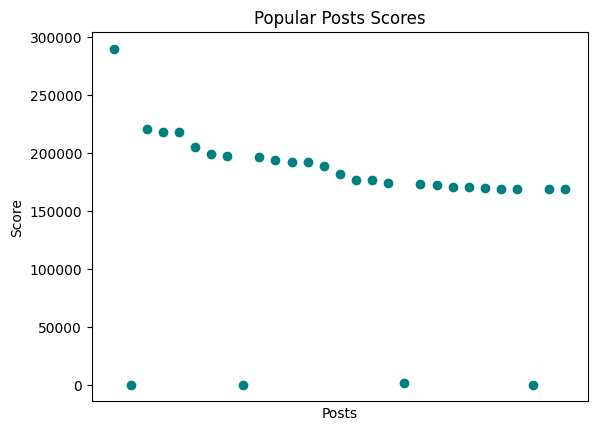

In [200]:
# Plotting score outliers
plt.title('Popular Posts Scores')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
x = popular_posts_df['id']
y = popular_posts_df['score']
plt.plot(x, y, "o", color="teal")
      
plt.show()

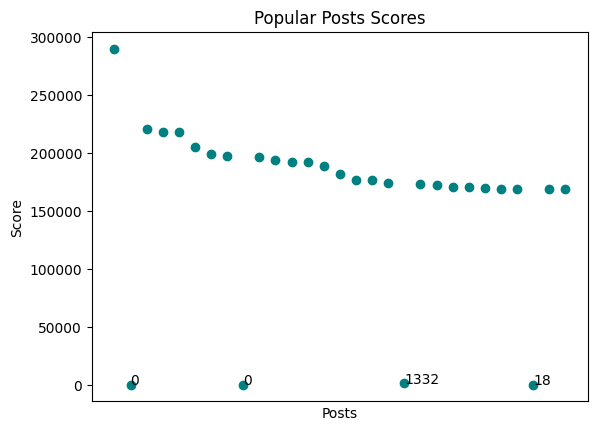

In [314]:
#Plotting score outliers with values 
plt.title('Popular Posts Scores')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

for i in range(len(popular_posts_df)):
    try:
        x = popular_posts_df['id'][i]
        y = popular_posts_df['score'][i]
        plt.plot(x, y, "o", color="teal")
        if  popular_posts_df['score'][i]<5000 :
            plt.text(x, y * (1 - 0.05), popular_posts_df['score'][i], fontsize=10)
    except:
        continue
plt.show()

In [315]:
#Showing Outliers
popular_posts_df.query('score < 50000')

,id,title,numComments,score,author,authorId,goldCount,domain
1,t3_187p59c,YSK MTN DEW GAME FUEL is back! Partnering with...,0,0,MTNDEWGaming,t2_t4otn2sq,0,mountaindew.com
8,t3_17g82xx,"r/gaming, what Mtn Dew flavor pairs best with ...",452,0,MtnDewOfficial,t2_ao7d8uab,0,mountaindew.com
18,t3_16uc8la,What would the world look like without US mili...,1263,1332,call_of_war_player,t2_vj2jjxzt,0,callofwar.com
26,t3_17wva9w,Your favorite game is iconic. Make it official...,0,18,PringlesUS,t2_apioax4u,0,ign.com


In [316]:
#Dropping outliers
popular_posts_df = popular_posts_df.drop([1,8,18,26])

In [317]:
popular_posts_df = popular_posts_df.reset_index(drop=True)

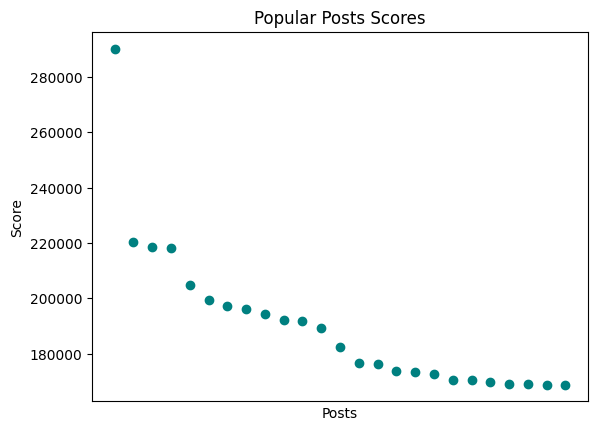

In [207]:
# Plotting score without outliers
plt.title('Popular Posts Scores')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
x = popular_posts_df['id']
y = popular_posts_df['score']
plt.plot(x, y, "o", color="teal")
      
plt.show()

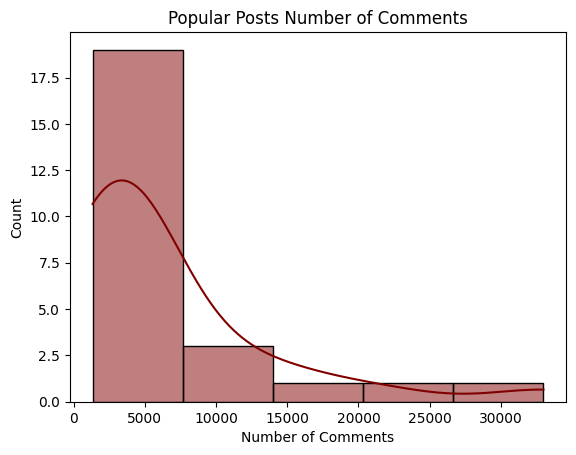

In [208]:
# Plotting histogram of comment numbers of popular posts 
plt.title('Popular Posts Number of Comments')
plt.ylabel('Count')
plt.xlabel('Number of Comments')
sns.histplot(data=popular_posts_df, x='numComments', bins=5,  kde=True, color='maroon' )
plt.show()

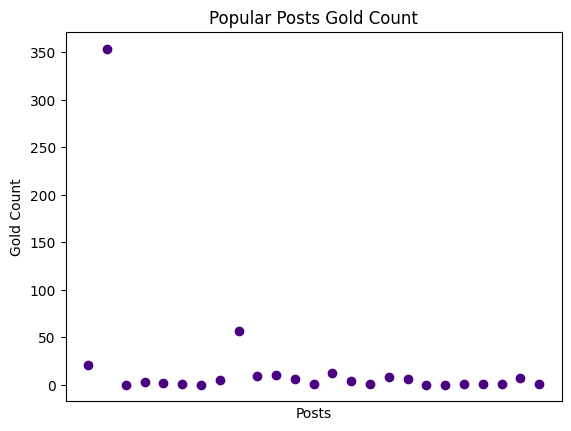

In [318]:
# Plotting gold count outliers
plt.title('Popular Posts Gold Count')
plt.ylabel('Gold Count')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = popular_posts_df['id']
y = popular_posts_df['goldCount']
plt.plot(x, y, "o", color="indigo")
      
plt.show()

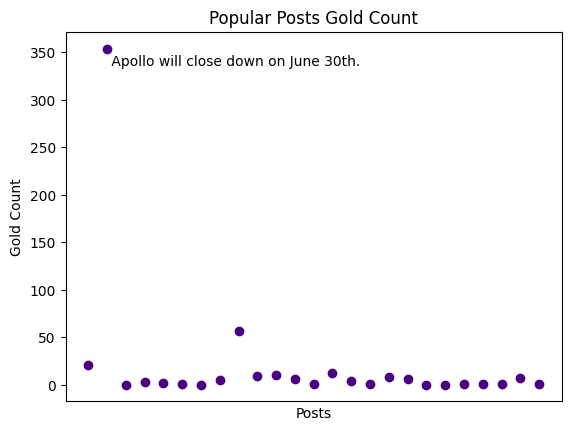

In [210]:
# Plotting gold count outlier with title
plt.title('Popular Posts Gold Count')
plt.ylabel('Gold Count')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)
for i in range(len(popular_posts_df)):
    try:
        x = popular_posts_df['id'][i]
        y = popular_posts_df['goldCount'][i]
        plt.plot(x, y, "o", color="indigo")
            
        if popular_posts_df['goldCount'][i] > 300:
            plt.text(x, y * (1 - 0.05), popular_posts_df['title'][i][1:39], fontsize=10)
    except:
        continue

plt.show()

In [313]:
# Finding outlier with function again
find_outliers(popular_posts_df, 'goldCount')

,id,title,numComments,score,author,authorId,goldCount,domain
2,t3_144f6xm,📣 Apollo will close down on June 30th. Reddit’...,15438,220416,iamthatis,t2_4mwol,354,self.apolloapp


In [212]:
popular_posts_df.query('goldCount > 300')

,id,title,numComments,score,author,authorId,goldCount,domain
1,t3_144f6xm,📣 Apollo will close down on June 30th. Reddit’...,15438,220416,iamthatis,t2_4mwol,354,self.apolloapp


In [213]:
# Dropping outlier in a new dataframe
popular_posts_df_without_goldCount_outlier = popular_posts_df.drop(1).reset_index(drop=True)

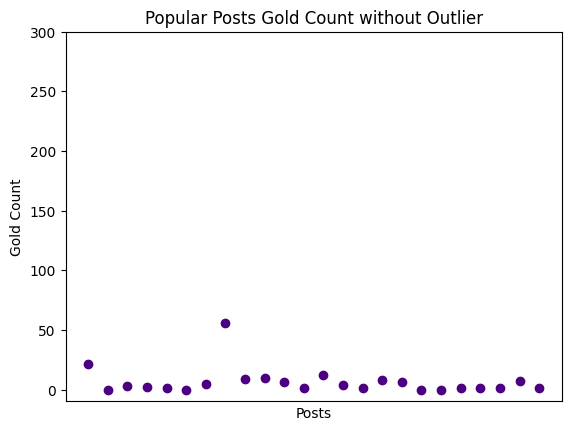

In [214]:
# Ploting without gold count outlier 
plt.title('Popular Posts Gold Count without Outlier')
plt.ylabel('Gold Count')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = popular_posts_df_without_goldCount_outlier['id']
y = popular_posts_df_without_goldCount_outlier['goldCount']
plt.plot(x, y, "o", color="indigo")
plt.ylim(-10,300)
plt.show()

<Axes: title={'center': 'Popular Posts Number of Comments and Score'}, xlabel='numComments', ylabel='Score'>

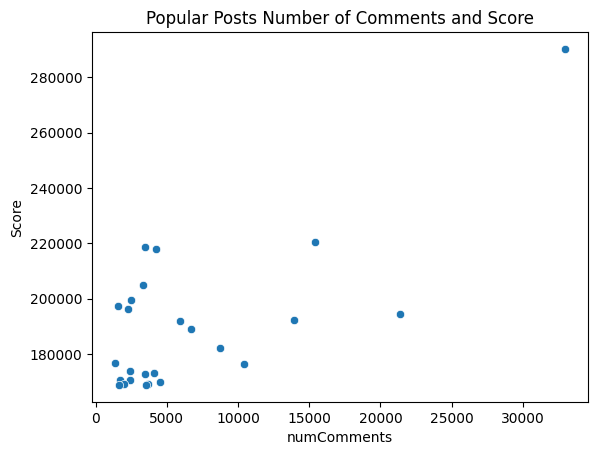

In [215]:
# Plotting  number of comment and score as a scatter plot
plt.title('Popular Posts Number of Comments and Score')
plt.ylabel('Score')
plt.xlabel('numComments')
sns.scatterplot(data=popular_posts_df,
                x="numComments",
                y="score",
                )


In [319]:
# Calculating correlation
matrix = popular_posts_df_without_goldCount_outlier[['numComments', 'score', 'goldCount']].corr()

In [320]:
matrix

,numComments,score,goldCount
numComments,1.000000,0.693501,0.680121
score,0.693501,1.000000,0.279506
goldCount,0.680121,0.279506,1.000000


<Axes: >

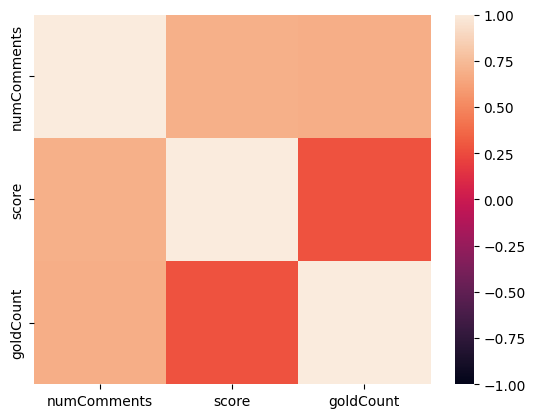

In [321]:
# There is positive correlation between number of comments and score
# There is positive correlation between number of comments and goldCount
sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values, vmin=-1)

In [220]:
# Getting basic statistics values of the data without the outliers
popular_posts_df_without_goldCount_outlier.describe()

,numComments,score,goldCount
count,24.000000,24.000000,24.000000
mean,6183.916667,188931.916667,6.500000
std,7342.935469,26589.057375,11.673083
min,1331.000000,168803.000000,0.000000
25%,2387.500000,170584.000000,1.000000
50%,3534.000000,179545.500000,2.500000
75%,6119.500000,196481.000000,7.250000
max,32997.000000,290221.000000,56.000000


## Data science posts

In [221]:
ds_posts_df.sample(5)

,id,title,numComments,score,author,authorId,goldCount,domain,post_text
18,t3_18nxz71,What are some of the most “confidently incorre...,196,190,Stauce52,t2_yjyfc,0,self.datascience,NaN
13,t3_18p8uz5,Why can't I transform a distribution by deduct...,23,49,wanderingcatto,t2_amc46yj2,0,self.datascience,Suppose I have records of the number of fishes...
19,t3_18nulu1,Should notebooks follow software engineering b...,55,63,n1k0h1k0,t2_soqhf,0,self.datascience,I’m divided myself on this topic because I get...
1,t3_18qrkqj,Have an upcoming interview for a data analyst ...,23,21,Impossible-Cry-495,t2_903k40ag,0,self.datascience,I have an interview at a company called Airbus...
27,t3_18n9928,Coding Excercise question,8,13,Esteban_Rdz,t2_38po62bx,0,self.datascience,I'm doing an excercise for an interview proces...


In [20]:
ds_posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28 non-null     object
 1   title        28 non-null     object
 2   numComments  28 non-null     int64 
 3   score        28 non-null     int64 
 4   author       28 non-null     object
 5   authorId     28 non-null     object
 6   goldCount    28 non-null     int64 
 7   domain       28 non-null     object
 8   post_text    24 non-null     object
dtypes: int64(3), object(6)
memory usage: 2.1+ KB


In [236]:
## Filling null post text with their titles
ds_posts_df['post_text'] = ds_posts_df.post_text.fillna(ds_posts_df.title)


### Detecting outliers

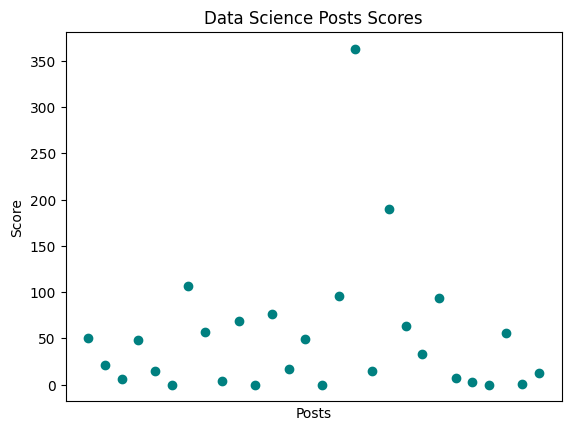

In [251]:
# Ploting score outlier
plt.title('Data Science Posts Scores')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = ds_posts_df['id']
y = ds_posts_df['score']
plt.plot(x, y, "o", color="teal")
      
plt.show()

In [252]:
#Getting the score outlier
find_outliers(ds_posts_df, 'score')

[16]

In [253]:
# Showing outlier
ds_posts_df.iloc[16]

id                                                    t3_18o7sqd
title                Is Everyone in data science a mathematician
numComments                                                  197
score                                                        363
author                                       skeletons_of_closet
authorId                                             t2_py4qwirz
goldCount                                                      0
domain                                          self.datascience
post_text      I come from a computer science background and ...
Name: 16, dtype: object

In [254]:
# Dropping outlier in a new dataframe
ds_posts_df_without_outlier = ds_posts_df.drop(16).reset_index(drop=True)

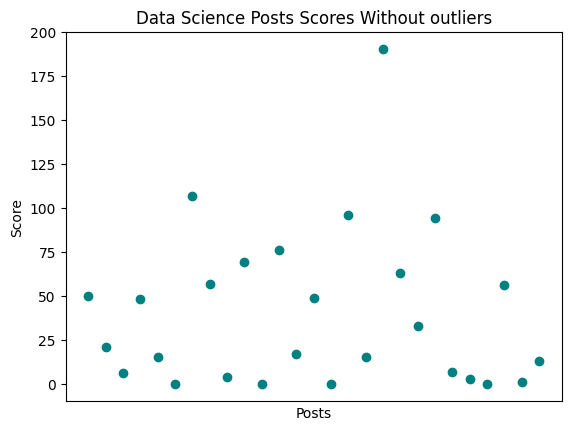

In [255]:
# Plotting post scores without outliers
plt.title('Data Science Posts Scores Without outliers')
plt.ylabel('Score')
plt.xlabel('Posts')
plt.tick_params(axis='both', which='both', labelbottom=False, bottom=False)

x = ds_posts_df_without_outlier['id']
y = ds_posts_df_without_outlier['score']
plt.plot(x, y, "o", color="teal")
plt.ylim(-10,200)     
plt.show()

In [322]:
# Checking if there is outlier in number of comments
find_outliers(ds_posts_df, 'numComments')

,id,title,numComments,score,author,authorId,goldCount,domain,post_text


<Axes: title={'center': 'Data Science Posts Number of Comments'}, xlabel='Number of Comments', ylabel='Count'>

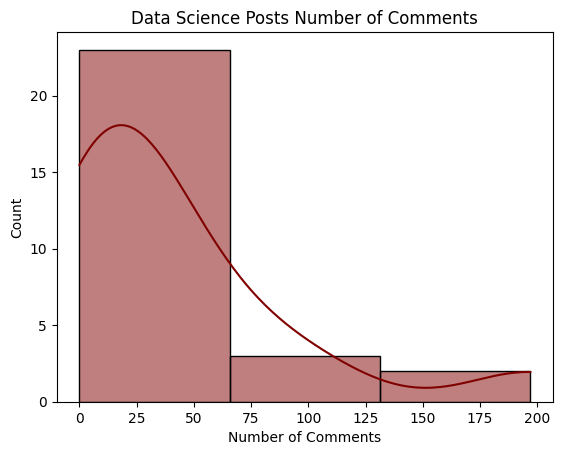

In [256]:
# Plotting histogram of data science comments number
plt.title('Data Science Posts Number of Comments')
plt.ylabel('Count')
plt.xlabel('Number of Comments')
sns.histplot(data=ds_posts_df, x='numComments', bins=3,  kde=True, color='maroon' )

<Axes: title={'center': 'Data Science Posts Number of Comments and Score'}, xlabel='numComments', ylabel='Score'>

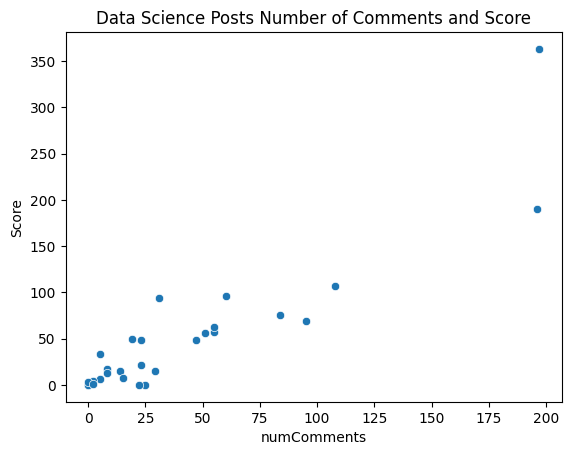

In [323]:
# Ploting score and number of comments
plt.title('Data Science Posts Number of Comments and Score')
plt.ylabel('Score')
plt.xlabel('numComments')
sns.scatterplot(data=ds_posts_df,
                x="numComments",
                y="score",
                )


In [259]:
#Calculating correlation
matrix = ds_posts_df_without_outlier[['numComments', 'score']].corr()

In [260]:
matrix

,numComments,score
numComments,1.000000,0.906015
score,0.906015,1.000000


<Axes: >

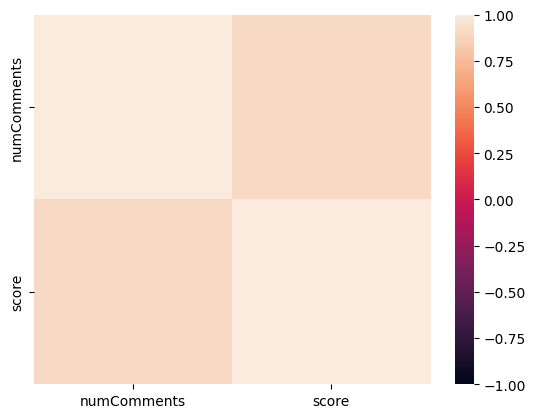

In [261]:
# There is positive correlation between score and number of comments
sns.heatmap(matrix, 
            xticklabels=matrix.columns.values,
            yticklabels=matrix.columns.values, vmin=-1)

In [262]:
# Getting basic statistics 
ds_posts_df_without_outlier.describe()

,numComments,score,goldCount
count,27.000000,27.000000,27.0
mean,36.370370,40.370370,0.0
std,43.783689,44.825429,0.0
min,0.000000,0.000000,0.0
25%,6.500000,5.000000,0.0
50%,23.000000,21.000000,0.0
75%,53.000000,60.000000,0.0
max,196.000000,190.000000,0.0


## Text analyze

In [288]:
import nlp_rake
from wordcloud import WordCloud
import string

In [271]:
# Turning post text series to a list
ds_post_text_list =ds_posts_df['post_text'].to_list()
ds_post_title_list=ds_posts_df['title'].to_list()

In [275]:
# We  filled none text value with title because of that we are removing the titles in the post text
for i in range (len(ds_post_text_list)):
    if (ds_post_text_list[i] == ds_post_title_list[i]):
        ds_post_text_list.replace(ds_post_text_list[i],"")

In [277]:
# Joining list to get a string
data_science_posts_titles  = " ".join(ds_post_title_list)


In [296]:
## Joining list to get a string
data_science_posts_text = " ".join(ds_post_text_list)


In [300]:
# Cleaning punctiation marks
exclude = set(string.punctuation)
data_science_posts_text = ''.join(ch for ch in data_science_posts_text if ch not in exclude)
data_science_posts_titles = ''.join(ch for ch in data_science_posts_titles if ch not in exclude)

In [301]:
data_science_posts_text[0:100]

'Hi all Id like to rehash my understanding of the fundamentals of probability theory Im trying to fin'

In [302]:
#Finding most frequent words in the post texts
extractor = nlp_rake.Rake(max_words=3,min_freq=3,min_chars=4)
res = extractor.apply(data_science_posts_text)
res

[('data science', 4.742424242424242),
 ('data scientist', 4.492424242424242),
 ('nonzero probability', 4.142857142857142),
 ('director role', 3.6333333333333333),
 ('company', 1.9230769230769231),
 ('things', 1.8333333333333333),
 ('role', 1.8333333333333333),
 ('working', 1.6),
 ('code', 1.5),
 ('it’s', 1.5),
 ('boss', 1.4),
 ('time', 1.375),
 ('project', 1.3333333333333333),
 ('feel', 1.3),
 ('team', 1.2857142857142858),
 ('started', 1.25),
 ('llms', 1.25),
 ('year', 1.25),
 ('dont', 1.25),
 ('left', 1.25),
 ('count 0', 1.2),
 ('work', 1.1666666666666667),
 ('find', 1.0),
 ('couple', 1.0),
 ('taking', 1.0),
 ('learn', 1.0),
 ('topic', 1.0)]

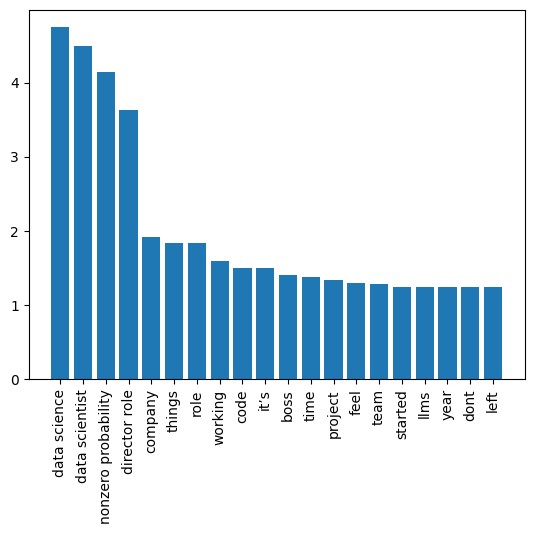

In [303]:
# Plotting frequent words in the post texts
def plot_frequent_words(pair_list):
    pair_list = pair_list[:20]
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot_frequent_words(res)

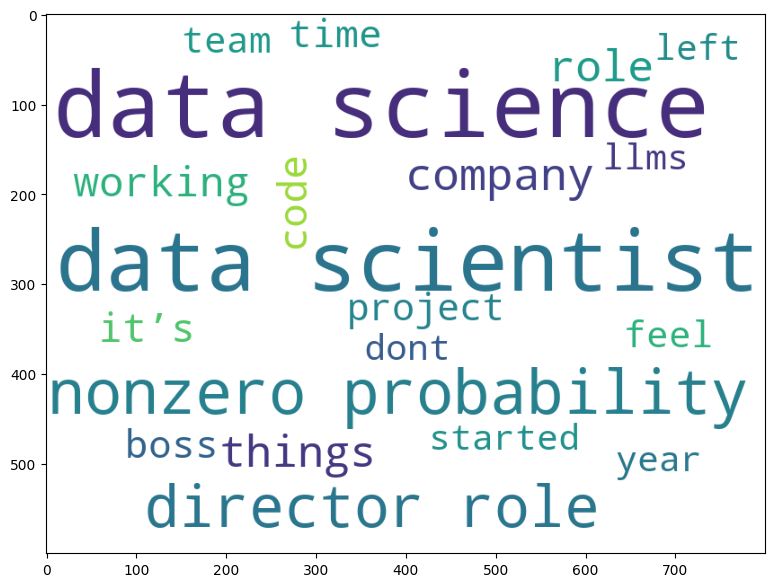

In [304]:
# Showing frequent words in the word cloud
wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res[:20] }))

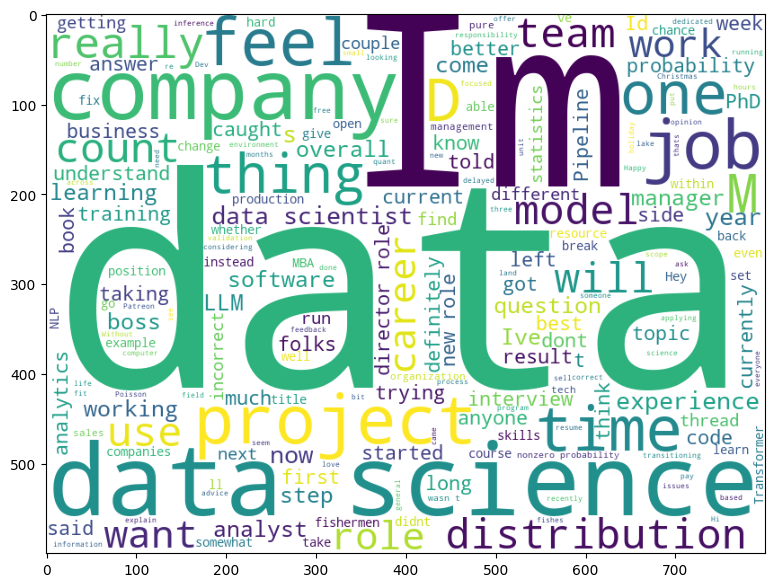

In [305]:
# Generating word cloud with post texts
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(data_science_posts_text))

In [306]:
# Getting titles and post texts in a str
ds_texts = data_science_posts_titles+  data_science_posts_text 

In [307]:
# Getting frequent words in post texts and titles
res = extractor.apply(ds_texts)
res

[('data science', 4.9125),
 ('data scientist', 4.6),
 ('nonzero probability', 4.25),
 ('director role', 3.58974358974359),
 ('company', 1.9285714285714286),
 ('role', 1.9230769230769231),
 ('things', 1.8333333333333333),
 ('working', 1.6),
 ('time', 1.5555555555555556),
 ('interview', 1.5),
 ('it’s', 1.5),
 ('code', 1.4),
 ('boss', 1.4),
 ('project', 1.2857142857142858),
 ('team', 1.2857142857142858),
 ('feel', 1.2727272727272727),
 ('advice', 1.25),
 ('started', 1.25),
 ('llms', 1.25),
 ('learn', 1.25),
 ('year', 1.25),
 ('dont', 1.25),
 ('left', 1.25),
 ('taking', 1.2),
 ('count 0', 1.2),
 ('work', 1.1428571428571428),
 ('couple', 1.0),
 ('difference', 1.0),
 ('make', 1.0),
 ('start', 1.0),
 ('find', 1.0),
 ('topic', 1.0)]

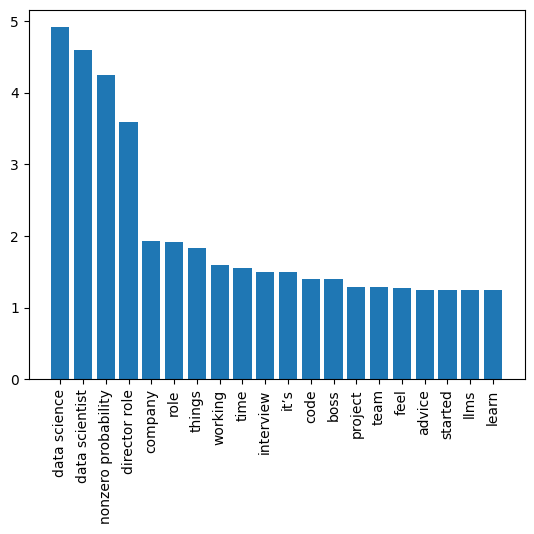

In [308]:
# Plotting frequent words in post texts and titles
plot_frequent_words(res)

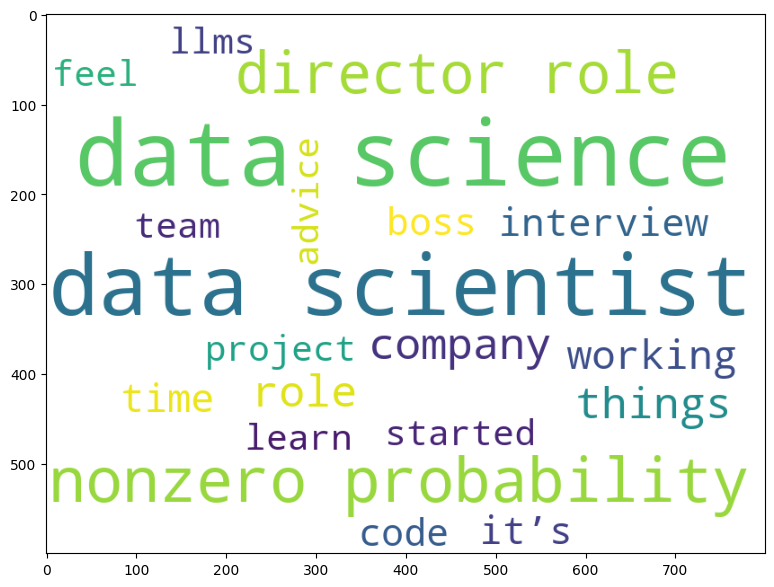

In [309]:
# Showing frequent words in the word cloud
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res[:20] }))

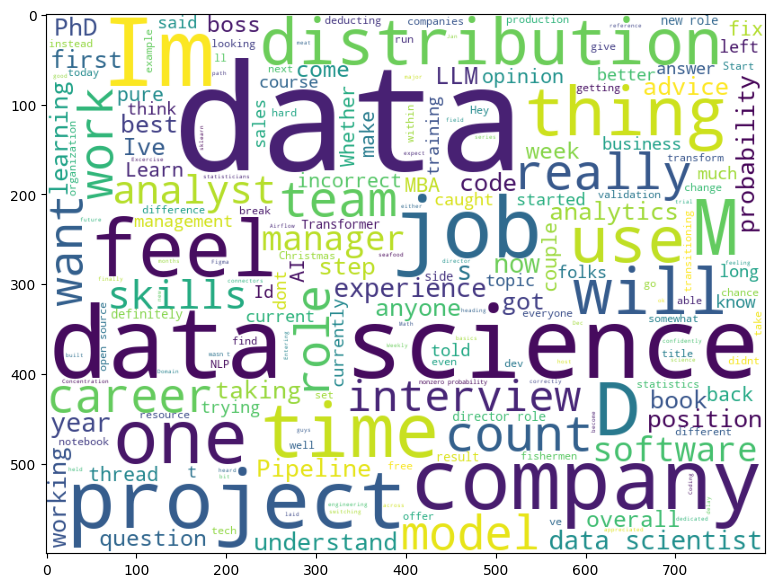

In [310]:
# Generating word cloud with post texts and post titles
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(ds_texts))